In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Dynamic Programming Practice

### Bellman-Ford

In [61]:
a = np.array([[0,6,5,2,2],
              [0,0,.5,5,7],
              [0,0,0,1,5],
              [0,0,0,0,3],
              [0,0,0,0,0]])
a = a + a.T
N = 5 # states
Ns = 3 # steps

In [72]:

initial = 0 # start index
t = 4 # terminal index
J = np.zeros((Ns-1,N)) # J_i^*(j) where i in [1,N], j in [0,N-1]
J[Ns-2,:] = a[t,:] # J^*_{N-1} = a_{it} for all i, "cost to go"
print("Optimal final cost i->t")
print(J[Ns-2,:])
for k in reversed(range(0,Ns-2)): # go backwards
  for i in range(0,N):
    J[k,i] = np.min(a[i,:] + J[k+1,:])
print("Optimal cost from starting point i->t")
print(J[0,:])
print("Cost-to-go matrix J") # J[i,j]: if in state j with N-1-i moves left
print(J)

Optimal final cost i->t
[2. 7. 5. 3. 0.]
Optimal cost from starting point i->t
[2.  5.5 4.  3.  0. ]
Cost-to-go matrix J
[[2.  5.5 4.  3.  0. ]
 [2.  7.  5.  3.  0. ]]


In [71]:
# control sequence
for i in range(0,N):
  seq = [i]
  for k in range(1,Ns-1):
    seq.append(np.argmin([a[seq[k-1],:] + J[k,:]]))
  seq.append(t)
  print(f"Optimal Sequence for state {i+1}: ")
  print("->".join([str(i+1) for i in seq]))


Optimal Sequence for state 1: 
1->1->5
Optimal Sequence for state 2: 
2->3->5
Optimal Sequence for state 3: 
3->4->5
Optimal Sequence for state 4: 
4->4->5
Optimal Sequence for state 5: 
5->5->5


### Optimal Parking 1.3.2
Stochastic dynamic programming with uncontrollable state elements

In [104]:
N = 200
C = 100
def p(k): # chance any spot is free
  return .05
def c(k): # cost of spot
  return .05*(N/2-k)**2
J_F = np.zeros((1,N)).flatten() # optimal cost to go if free spot
J_FB = np.zeros((1,N)).flatten() # optimal cost to go if non free spot
J_F[N-1] = min(c(N-1),C)
J_FB[N-1] = C # g_N(x_N)
for k in reversed(range(N-1)):
  J_F[k] = min(c(k),p(k+1)*J_F[k+1] + (1-p(k+1))*J_FB[k+1])
  J_FB[k] = p(k+1)*J_F[k+1] + (1-p(k+1))*J_FB[k+1]
J = np.array([p(k)*J_F[k] + (1-p(k))*J_FB[k] for k in range(N)]) # expected cost to go before seeing if spot open
policy = 100*np.array([c(k) < J[k+1] for k in range(N-1)])

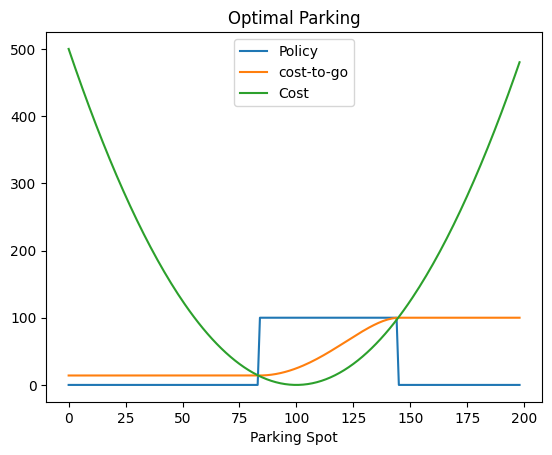

In [105]:
ks = np.arange(N-1)
plt.plot(ks,policy,label="Policy")
plt.plot(ks,J[:-1],label="expected cost-to-go")
plt.plot(ks,c(ks),label="Cost")
plt.legend()
plt.title("Optimal Parking")
plt.xlabel("Parking Spot")
plt.show()